## Importing train dataset

In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\ST 4035\\train.csv')
#df

C:\Users\User\AppData\Local\Temp\ipykernel_8916\189811514.py:3: DtypeWarning: Columns (494,597,599,600,601,603,604) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\ST 4035\\train.csv')


## Data preprocessing

### Checking the columns with mixed data types

In [2]:
print(df.iloc[:, [494, 597, 599, 600, 601, 603, 604]].head())

  PulseRhythem Redcells3 Redcells5 Redcells6 Redcells7 Redcells9 Redcells10
0           99        99        99        99        99        99         99
1           99        99        99         0        99        99         99
2           99        99        99        99        99        99         99
3           99        99        99        99        99        99         99
4           99        99        99        99        99        99         99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 806 entries, ID to Final
dtypes: float64(230), int64(565), object(11)
memory usage: 8.5+ MB


In [4]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Puscells', 'Redcells', 'PulseRhythem', 'Redcells2', 'Redcells3',
       'Redcells4', 'Redcells5', 'Redcells6', 'Redcells7', 'Redcells9',
       'Redcells10'],
      dtype='object')


In [5]:
print(df[['Redcells8']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Redcells8  1387 non-null   int64
dtypes: int64(1)
memory usage: 11.0 KB
None


In [6]:
print(df[['Puscells2']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Puscells2  1387 non-null   int64
dtypes: int64(1)
memory usage: 11.0 KB
None


In [7]:
print(df[['PulseRate']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PulseRate  1387 non-null   int64
dtypes: int64(1)
memory usage: 11.0 KB
None


### Specifying data types

In [8]:
for col in object_columns:
    if col == 'PulseRhythem':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].astype('Int64')

In [9]:
df['Redcells8'] = pd.to_numeric(df['Redcells8'], errors='coerce')
df['Redcells8'] = df['Redcells8'].astype('Int64')

### Checking for duplicates

In [10]:
duplicates = df[df.duplicated()]
duplicates

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final


### Dropping 'ID' column 

In [11]:
df = df.drop(columns=['ID'])

###  Specifying '99' as a missing value

In [12]:
import numpy as np
df.replace(99, np.nan, inplace=True)

### Identifying columns with high missing value percentage 

In [13]:
total_data_points = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_data_points) * 100
sorted_missing_percentage = missing_percentage.sort_values(ascending=True)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)
print(sorted_missing_percentage)

Year               0.000000
Isolate            0.000000
Sample             0.000000
Final              0.000000
Month              0.000000
                    ...    
Pomona            99.927902
PomonaF          100.000000
Geyaweera        100.000000
S.phosphate10    100.000000
PulseRhythem     100.000000
Length: 805, dtype: float64


### Dropping columns with missing value percentage > 80%

In [14]:
columns_to_drop = missing_percentage[missing_percentage > 80].index
df = df.drop(columns=columns_to_drop)

In [15]:
total_data_points = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_data_points) * 100
sorted_missing_percentage = missing_percentage.sort_values(ascending=True)
print(sorted_missing_percentage)

Year                  0.000000
Isolate               0.000000
Sample                0.000000
Final                 0.000000
Hospital              0.000000
                       ...    
Lymphadenopathy10    79.812545
CultureqPCRDia       79.884643
Bleeding10           79.884643
SBP4                 79.956741
Pulserate7           79.956741
Length: 466, dtype: float64


### Selecting necessary columns

In [16]:
# All clinical features and investigation findings on day 2 of illness to day 10 of illness are dropped.
columns_to_keep = ['MAT_set_1','Acu_L.interrogansserovarwolfiistr.3705', 'Acu_L.interrogansserovarAlexistr.616', 'Acu_L.santarosaiserovarGeorgiastr.LT117']
columns_to_drop = [col for col in df.columns if any(str(num) in col for num in range(2, 11)) and col not in columns_to_keep]
df.drop(columns=columns_to_drop, inplace=True)

# All optimised panel of serovars as listed in subsequent variables are dropped.
columns_to_drop = [col for col in df.columns if 'Acu_' in col]
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
total_data_points = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_data_points) * 100
sorted_missing_percentage = missing_percentage.sort_values(ascending=True)
print(sorted_missing_percentage)

Year                   0.000000
Isolate                0.000000
Sample                 0.000000
Final                  0.000000
Hospital               0.000000
                        ...    
ESR                   76.928623
T.Bilirubin           78.010094
SerumqPCRDiagnosis    78.875270
OtherrhodentsHome     79.452055
CultureqPCRDia        79.884643
Length: 171, dtype: float64


### Checking the distributions of continuous variables

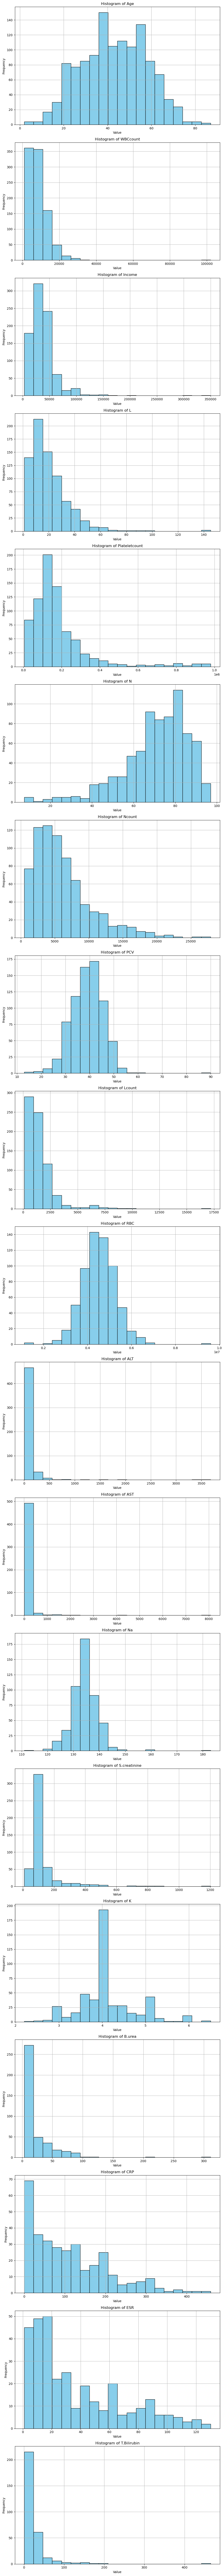

In [18]:
import matplotlib.pyplot as plt

continuous_columns = ['Age', 'WBCcount', 'Income', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'ALT', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']

num_plots = len(continuous_columns)
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, column in enumerate(continuous_columns):
    axs[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### Cleaning  'MAT_set_1' variable

In [19]:
df['MAT_set_1'] = df['MAT_set_1'].fillna(0)

### Replacing missing values of categorical columns with mode

In [20]:
columns_with_modes = df.mode().iloc[0]
replacement_values = {column: columns_with_modes[column] for column in df.columns if column not in ['Age', 'WBCcount', 'Income', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'ALT', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']}
df = df.fillna(replacement_values)

### Replacing missing values with median for skewed distributions

In [21]:
columns_with_medians = ['WBCcount', 'Income', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'ALT', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']
medians = df[columns_with_medians].median()
median_values = {column: medians[column] for column in columns_with_medians}
df.fillna(median_values, inplace=True)

### Replacing missing values with mean for normal distributions

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

## Descriptive analysis 

### Descriptive statistics of the dataset

In [23]:
sel_cols = ['Age', 'WBCcount', 'Income', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'ALT', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']
dfn = df[sel_cols]
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1387.0,4.295563e+01,13.926202,2.000000e+00,3.400000e+01,4.295563e+01,5.300000e+01,8.700000e+01
WBCcount,1387.0,8.107471e+03,4841.729569,1.030000e+03,5.900000e+03,7.200000e+03,9.025000e+03,1.020000e+05
Income,1387.0,3.499567e+04,20422.397270,3.000000e+03,3.000000e+04,3.000000e+04,4.000000e+04,3.500000e+05
L,1387.0,1.836518e+01,11.102060,9.982788e-01,1.520587e+01,1.644444e+01,1.776894e+01,1.452514e+02
Plateletcount,1387.0,1.619368e+05,119035.689373,4.300000e+03,1.340000e+05,1.400000e+05,1.475000e+05,9.800000e+05
N,1387.0,7.197593e+01,11.655631,7.482993e+00,7.202058e+01,7.325000e+01,7.486405e+01,9.699656e+01
Ncount,1387.0,5.753043e+03,3151.614253,5.000000e+02,4.860000e+03,5.260000e+03,5.500000e+03,2.790000e+04
PCV,1387.0,3.895423e+01,4.862454,1.300000e+01,3.850000e+01,3.900000e+01,3.950000e+01,9.000000e+01
Lcount,1387.0,1.314898e+03,989.432452,1.090000e+02,1.100000e+03,1.140000e+03,1.200000e+03,1.718600e+04
RBC,1387.0,4.520921e+06,528137.319009,1.130000e+06,4.510000e+06,4.510000e+06,4.510000e+06,9.600000e+06


### Exploratory Data Analysis (EDA) 

#### Univariate analysis 

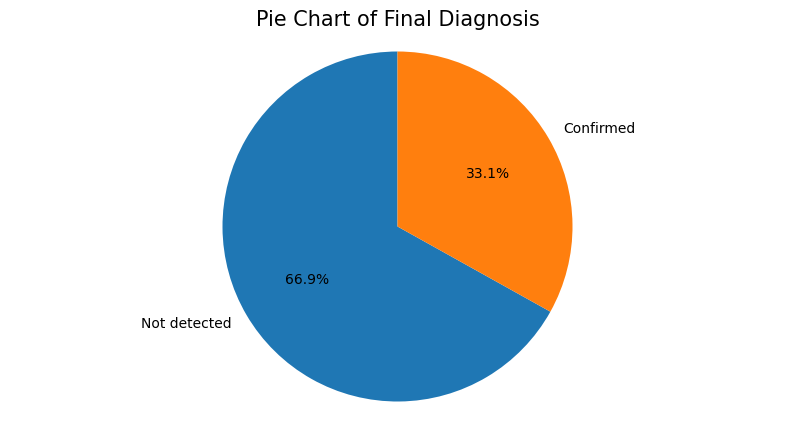

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Pie Chart of Final Diagnosis', fontsize=15)

label_mapping = {1: 'Confirmed', 2: 'Not detected'}

eda_percentage = df['Final'].replace(label_mapping).value_counts(normalize=True).rename_axis('Final').reset_index(name='Percentage')

ax = plt.pie(eda_percentage['Percentage'].head(10), labels=eda_percentage['Final'].head(10), autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

The pie chart shows that close to two-thirds of the patients have not been detected with leptospirosis disease, while others were confirmed with it in the final diagnosis.

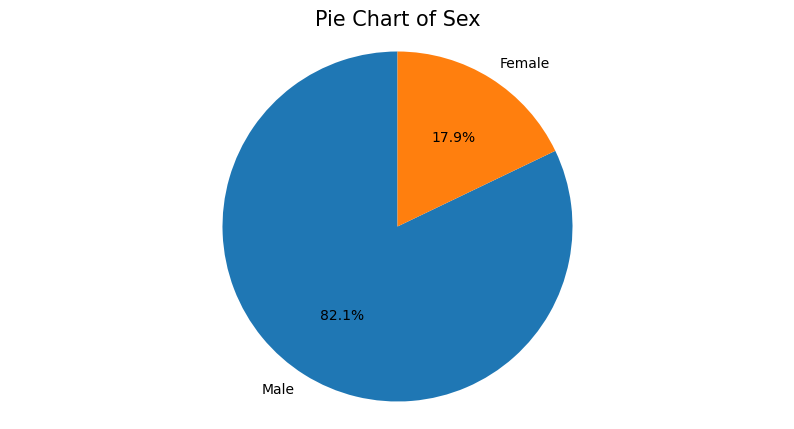

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Pie Chart of Sex', fontsize=15)

label_mapping = {1: 'Male', 2: 'Female'}

eda_percentage = df['Sex'].replace(label_mapping).value_counts(normalize=True).rename_axis('Sex').reset_index(name='Percentage')

ax = plt.pie(eda_percentage['Percentage'].head(10), labels=eda_percentage['Sex'].head(10), autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

Most of the patients (82.1%) present in the dataset are males, while the others (17.9%) are females.

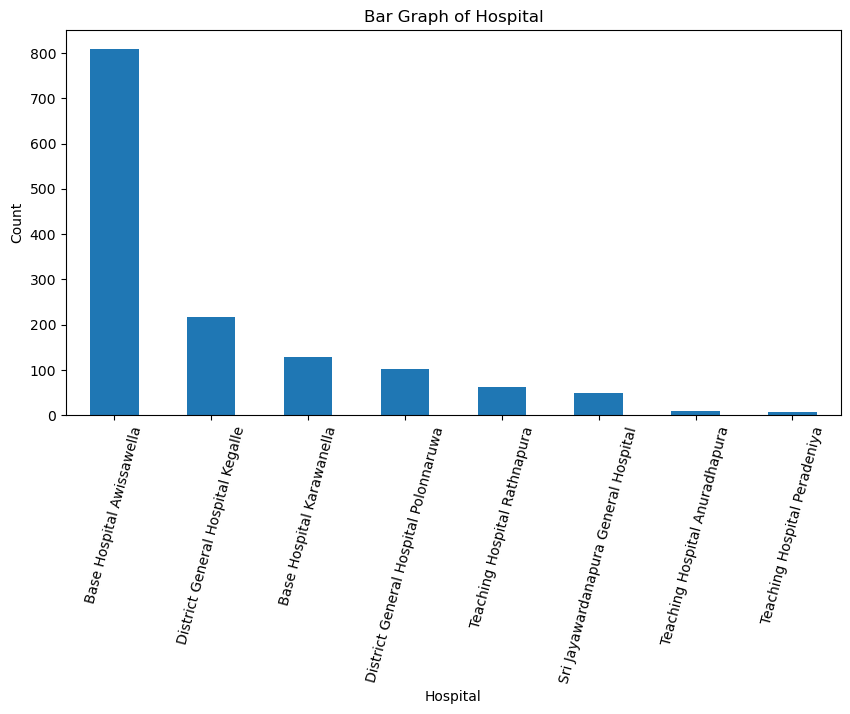

In [26]:
hospital_mapping = {
    '1': 'Base Hospital Awissawella',
    '2': 'District General Hospital Kegalle',
    '3': 'Base Hospital Karawanella',
    '4': 'District General Hospital Polonnaruwa',
    '5': 'Teaching Hospital Rathnapura',
    '6': 'Sri Jayawardanapura General Hospital',
    '7': 'Teaching Hospital Anuradhapura',
    '8': 'Teaching Hospital Peradeniya'
}

hospital_counts = df['Hospital'].value_counts()

order_list = ['1', '2', '3', '4', '5', '6', '7', '8']

hospital_counts.index = pd.CategoricalIndex(hospital_counts.index, categories=order_list, ordered=True)

plt.figure(figsize=(10, 5))
hospital_counts.sort_index().plot(kind='bar')
plt.xlabel('Hospital')
plt.ylabel('Count')
plt.title('Bar Graph of Hospital')
plt.xticks(rotation=75)

plt.xticks(ticks=range(len(order_list)), labels=[hospital_mapping[label] for label in order_list])

plt.show()

According to the bar graph, most patients were admitted to base hospital Awissawella, while a low number of patients were admitted to teaching hospitals Anuradhapura and Peradeniya.

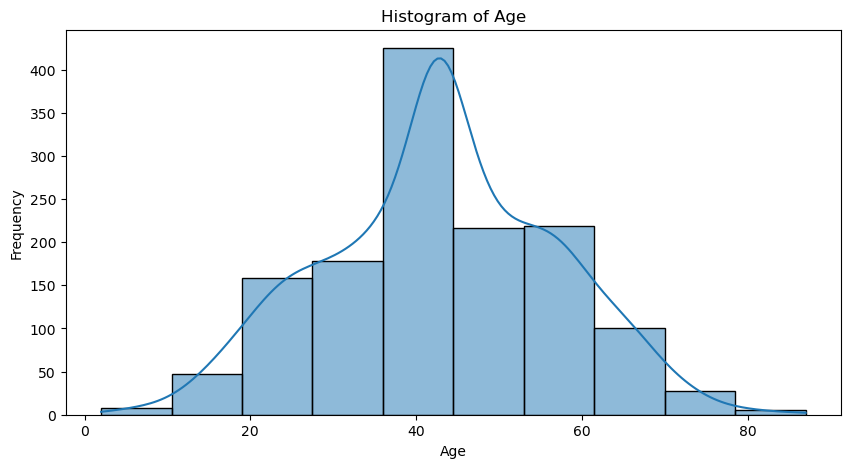

In [27]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

According to this histogram and previous histograms, only the 'Age' variable is distributed normally. Also, most of the patients are close to age 40.

#### Bivariate analysis 

<Figure size 1000x500 with 0 Axes>

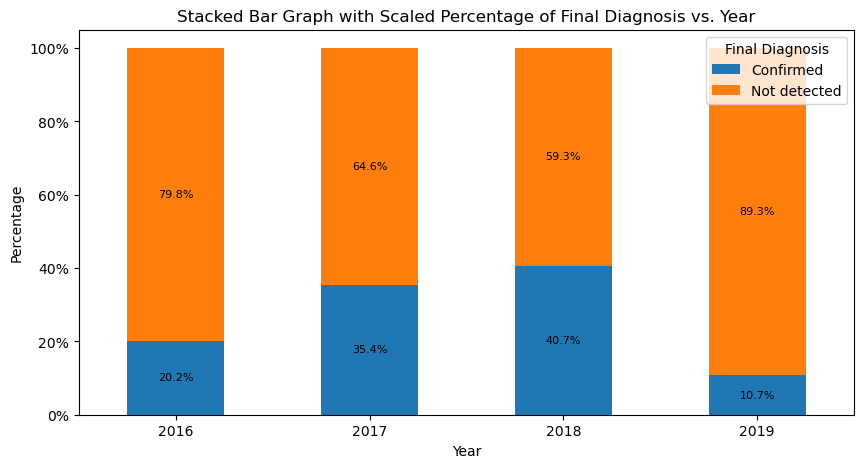

In [28]:
import matplotlib.ticker as mtick

final_mapping = {1: 'Confirmed', 2: 'Not detected'}

table_data = pd.crosstab(df['Year'], df['Final'].replace(final_mapping), margins=False)

table_data_percentage = table_data.div(table_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 5))
ax = table_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Stacked Bar Graph with Scaled Percentage of Final Diagnosis vs. Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Final Diagnosis')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='black')

plt.show()

According to the above graph, in each year, the number of patients who are diagnosed with leptospirosis disease is less than the number of patients who are not detected with it. However, the percentage of patients who are diagnosed with the disease has been increasing until it dropped significantly in 2019.

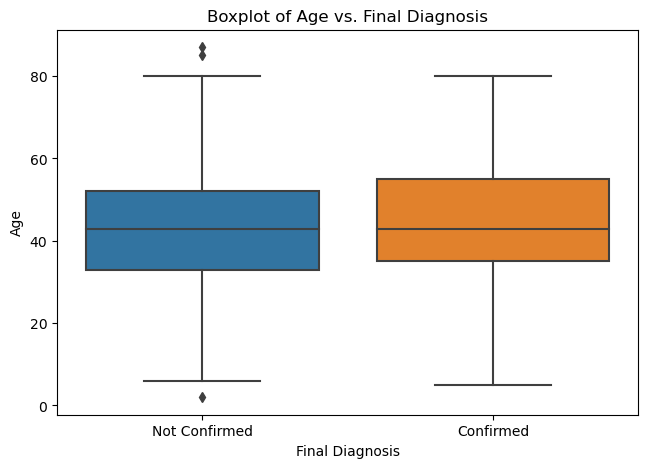

In [29]:
plt.figure(figsize=(7.5, 5))
sns.boxplot(x=df['Final'].replace({1: 'Confirmed', 2: 'Not Confirmed'}), y=df['Age'], data=df)
plt.xlabel('Final Diagnosis')
plt.ylabel('Age')
plt.title('Boxplot of Age vs. Final Diagnosis')
plt.show()

The 'Age' distribution of the patients who are diagnosed with leptospirosis disease is right-skewed, while the distribution of patients who are not confirmed with the disease is normally distributed. Also, there are outliers present in the normally distributed boxplot.

### Checking for correlation 

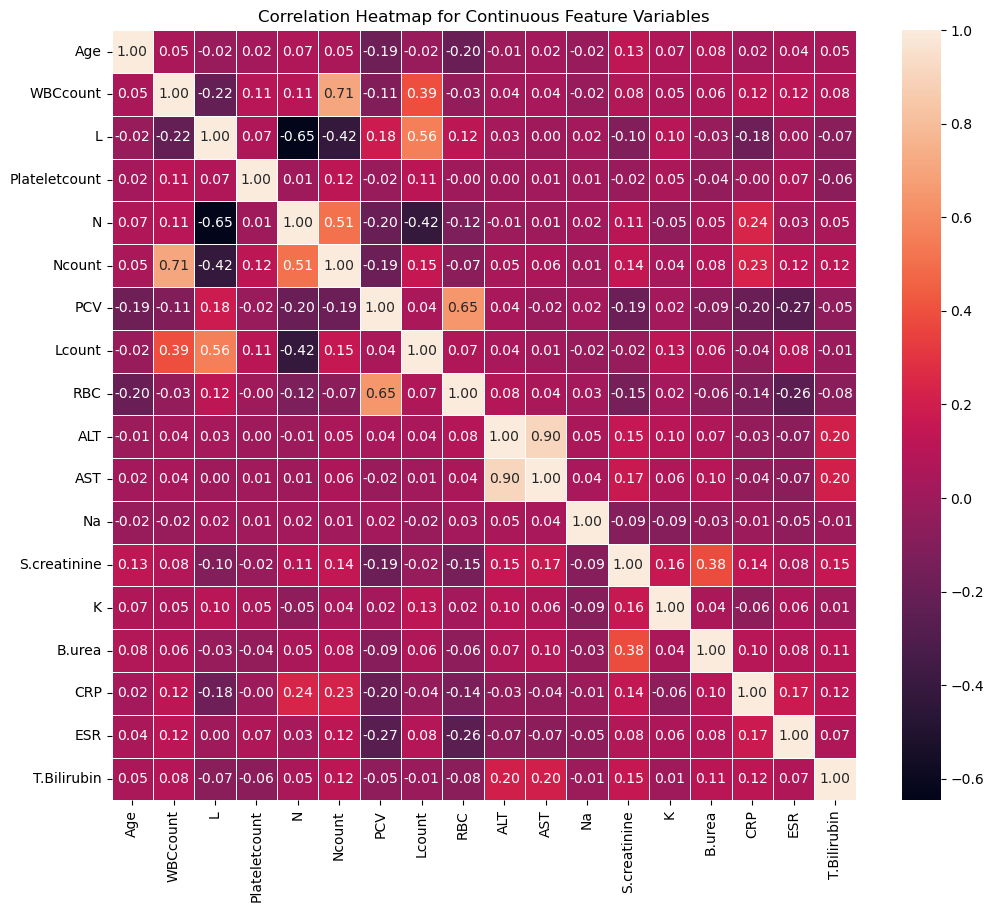

In [30]:
# Checking for correlation between continuous feature variables.
cont_columns = ['Age', 'WBCcount', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'ALT', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']

correlation_matrix = df[cont_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Feature Variables')
plt.show()

In [31]:
df.drop(['ALT'], axis=1, inplace=True)

In [32]:
# Checking for correlation between categorical feature variables and target variable.
from scipy.stats import chi2_contingency

cont_fin_columns = ['Age', 'WBCcount', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin', 'Final']

results = []

for column in df.columns:
    if column not in cont_fin_columns:
        contingency_table = pd.crosstab(df[column], df['Final'])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results.append((column, p))

sorted_results = sorted(results, key=lambda x: x[1])

#for column, p_value in sorted_results:
#    print(f"Chi-square test for {column}:")
#    print(f"P-value: {p_value}")

### Removing unnecessary columns before fitting the model

In [33]:
columns_to_drop = [column for column, p_value in results if p_value > 0.05]
df.drop(columns=columns_to_drop)

# Dropped date variables.
df.drop(['Year', 'Month'], axis=1, inplace=True)

# Dropped education variables, since they can't affect the disease status.
df.drop(['Education', 'TertiaryEducation'], axis=1, inplace=True)

# Dropped 'Income' variable, since it can't affect the disease status.
df.drop(['Income'], axis=1, inplace=True)

## Transforming train dataset by standardizing 

In [34]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'WBCcount', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']
numerical_features = df[numerical_columns]
scaled_features = StandardScaler().fit_transform(numerical_features)
df[numerical_columns] = scaled_features

## Importing test dataset

In [35]:
dft = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\ST 4035\\test.csv')
#dft

## Data preprocessing

### Checking the columns with mixed data types

In [36]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Columns: 805 entries, ID to FU_Patoc
dtypes: float64(199), int64(597), object(9)
memory usage: 2.1+ MB


In [37]:
object_columns = dft.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Puscells', 'Redcells', 'PulseRhythem', 'Redcells2', 'Redcells3',
       'Redcells4', 'Redcells5', 'Redcells7', 'Redcells8'],
      dtype='object')


### Specifying data types

In [38]:
for col in object_columns:
    if col == 'PulseRhythem':
        dft[col] = pd.to_numeric(dft[col], errors='coerce')
    else:
        dft[col] = pd.to_numeric(dft[col], errors='coerce')
        dft[col] = dft[col].astype('Int64')

In [39]:
dft['Redcells6'] = pd.to_numeric(dft['Redcells6'], errors='coerce')
dft['Redcells6'] = dft['Redcells6'].astype('Int64')
dft['Redcells9'] = pd.to_numeric(dft['Redcells9'], errors='coerce')
dft['Redcells9'] = dft['Redcells9'].astype('Int64')
dft['Redcells10'] = pd.to_numeric(dft['Redcells10'], errors='coerce')
dft['Redcells10'] = dft['Redcells10'].astype('Int64')

### Checking for duplicates

In [40]:
duplicates = dft[dft.duplicated()]
duplicates

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc


### Dropping 'ID' column 

In [41]:
dft = dft.drop(columns=['ID'])

### Specifying '99' as a missing value

In [42]:
dft.replace(99, np.nan, inplace=True)

### Selecting necessary columns

In [43]:
necessary_columns = [col for col in df.columns if col != 'Final']
dft = dft[necessary_columns]

### Cleaning  'MAT_set_1' variable

In [44]:
dft['MAT_set_1'] = dft['MAT_set_1'].fillna(0)

### Replacing missing values of categorical columns with mode

In [45]:
replacement_values = {column: columns_with_modes[column] for column in dft.columns if column not in ['Age', 'WBCcount', 'L', 'Plateletcount', 'Ncount', 'N', 'PCV', 'Lcount', 'RBC', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'T.Bilirubin']}
dft = dft.fillna(replacement_values)

### Replacing missing values with median for skewed distributions

In [46]:
median_values = {column: medians[column] for column in columns_with_medians}
dft.fillna(median_values, inplace=True)

### Replacing missing values with mean for normal distributions

In [47]:
dft['Age'] = dft['Age'].fillna(df['Age'].mean())

## Transforming test dataset by standardizing 

In [48]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Age', 'WBCcount', 'L', 'Plateletcount', 'N', 'Ncount', 'PCV', 'Lcount', 'RBC', 'AST', 'Na', 'S.creatinine', 'K', 'B.urea', 'CRP', 'ESR', 'T.Bilirubin']
numerical_features = dft[numerical_columns]
scaled_features = StandardScaler().fit_transform(numerical_features)
dft[numerical_columns] = scaled_features

## Fitting the model

In [49]:
# Used logistic regression since 'y' is binary.
y_train = df['Final']
x_train = df.drop(columns=['Final'])
x_test = dft

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=20000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=20000)

## Getting the predictions from the model

In [50]:
y_test = logistic_model.predict(x_test)

ids = range(1, len(y_test) + 1)
output = pd.DataFrame({'ID': ids, 'Final': y_test})
output.to_csv('test_predictions.csv', index=False)